# New Section

In [ ]:
# Import Libraries 

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import PIL
import numpy as np
import pandas as pd
import os
from PIL import Image
import matplotlib
from PIL import Image, ImageChops, ImageEnhance
from skimage.io import imread
from skimage import exposure, color
from skimage.transform import resize
from skimage.io import imread, imshow, concatenate_images
from skimage.transform import resize
from skimage.morphology import label
from itertools import chain
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model, load_model
from keras.layers import Input, BatchNormalization, Activation, Dense, Dropout
from keras.layers.core import Lambda, RepeatVector, Reshape
from numpy import save,load


from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

from keras.optimizers import Adam,SGD
from keras import optimizers

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import load_model

from keras.applications.resnet import ResNet50
from keras.applications.resnet import ResNet101

from sklearn.metrics import roc_curve, auc,roc_auc_score

from tqdm import tqdm
import cv2

from keras.layers import Input, BatchNormalization, Activation, Dense, Dropout
from keras.layers.core import Lambda, RepeatVector, Reshape
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D, GlobalMaxPool2D
from keras.layers import concatenate


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path_original = '/content/drive/My Drive/training/pristine/'
path_tampered = '/content/drive/My Drive/training/fake/'
dataset_path = '/content/drive/My Drive/training/'
total_original = os.listdir(path_original)
total_tampered = os.listdir(path_tampered)

In [ ]:
total_tampered.remove('.DS_Store')


In [ ]:
total_tampered

['b2f2970f8f0f4ab82b0483b022309ecf.mask.png',
 '0294345b3b2324b195cb3b30e91d7678.png',
 'd6f1c10e0059e0ac468537ceac0f22e1.png',
 'dedfc7b72b5c7ce42bd3e93df033a531.png',
 'b21ec9c8f63bb394181430af882a8a99.png',
 'bcbc7bef972e1b0ad0ebf8d4781aba31.mask.png',
 '93644a457afc64b27a692c1ecd9df773.mask.png',
 'be3c9e989860de924073c3b60aae71bd.png',
 'd2d7c3bf0395220f58bdc48df5a9c8d6.png',
 'd86c77402f58687283542ae735f327f8.mask.png',
 'c0a07e462960bd1eb37b5b0c1753c0fa.png',
 'c890621aeaafe9b0e353f29a7d93391d.png',
 'af4e76c3b9ef022cbffb9795592729ec.png',
 'ca8f5bc4dfc11f10d823230e1c800caf.mask.png',
 '14548214e97adf237ee3bac90809baf6.png',
 'd5e9b0e1fd8aa49e0e483cd1bef9d61e.png',
 'bb24d8980818339d65bb77a978b0f4ad.png',
 'd958cd2313d0c5eb6d55c9d96c25c8b8.mask.png',
 'b36e7a5450bf93dfa0484d22c6bab840.png',
 '92867350a784fbe8e00892796dc94eea.mask.png',
 '08829849d0b1c71e437961e841e0c81f.mask.png',
 '839128f5837a4d3614e9f1f6b4cf087e.mask.png',
 'a190948fddf9545c431efaebddee915d.png',
 'c2ccae30cc

In [ ]:
#saving the path along with the file names
pristine_images = []
for i in total_original:
    pristine_images.append(dataset_path+i)
fake_images = []
for i in total_tampered:
    fake_images.append(dataset_path+i)

In [ ]:
total_tampered[0:5]

['b2f2970f8f0f4ab82b0483b022309ecf.mask.png',
 '0294345b3b2324b195cb3b30e91d7678.png',
 'd6f1c10e0059e0ac468537ceac0f22e1.png',
 'dedfc7b72b5c7ce42bd3e93df033a531.png',
 'b21ec9c8f63bb394181430af882a8a99.png']

In [ ]:
def mask_pristine(path):
    img = Image.open(path).convert("RGB")
    img_shape=(np.array(img)).shape
    return np.ones((img_shape))*255

def plot_ground_truth_mask(image,fake=True):
    if fake:
        PATH=path_tampered+image.replace('.mask','')
    else:
        PATH=path_original+image

    PATH_mask=PATH[:-3]+'mask.png'
    
    img = Image.open(PATH).convert("RGB")
    
    try:
        mask_img=Image.open(PATH_mask).convert("RGB")
    except:
        mask_img=mask_pristine(PATH)
    fig = plt.figure(figsize=(15,10))
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax1.set_title("Image")
    ax2.set_title("Ground Truth Mask")
    ax1.imshow(img)
    ax2.imshow(mask_img)


In [ ]:
'd507e807f025f09ea0cff40b52e9322c.mask.png'.replace('.mask','')[0:-4]

'd507e807f025f09ea0cff40b52e9322c'

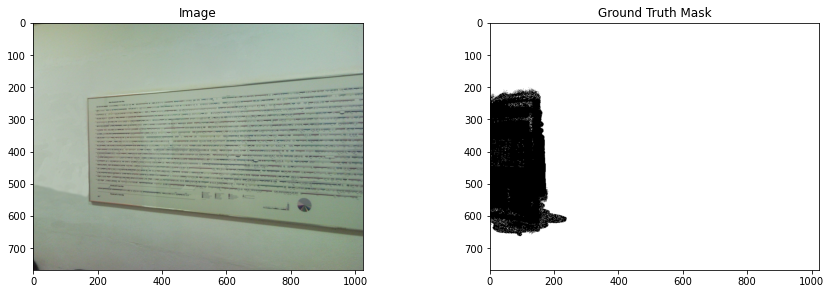

In [ ]:
plot_ground_truth_mask(total_tampered[2])

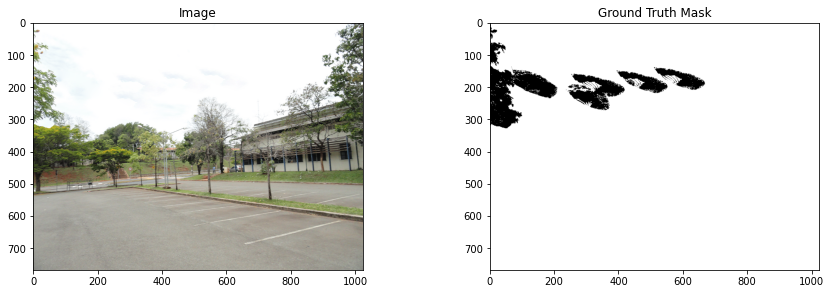

In [ ]:
plot_ground_truth_mask(total_tampered[4])

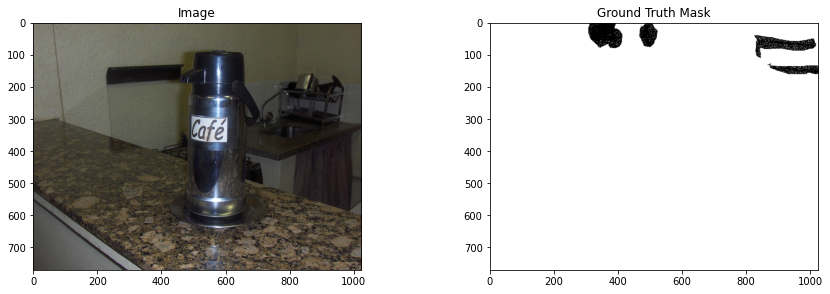

In [ ]:
plot_ground_truth_mask(total_tampered[7])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


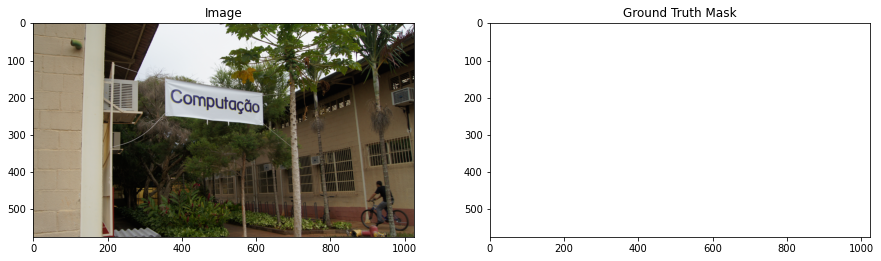

In [ ]:
plot_ground_truth_mask(total_original[5],fake=False)

In [ ]:
len(total_tampered)

900

In [ ]:
if not os.path.exists(dataset_path+"resized_images/"):
    os.makedirs(dataset_path+"resized_images/fake_masks/")
    os.makedirs(dataset_path+"resized_images/image/fake_images/")
    os.makedirs(dataset_path+"resized_images/image/pristine_images/")
    height = 512
    width = 512
    for fake_image in tqdm(total_tampered):
        
        if('.mask' in fake_image):
            img=Image.open(path_tampered + fake_image).convert("RGB")
            
        
            img = img.resize((height, width), PIL.Image.ANTIALIAS)
            img.save(dataset_path+"resized_images/fake_masks/"+fake_image)
        else:
            
            img=Image.open(path_tampered + fake_image).convert("RGB")
            
            img = img.resize((height, width), PIL.Image.ANTIALIAS)
            img.save(dataset_path+"resized_images/image/fake_images/"+fake_image)
            
    for pristine_image in tqdm(total_original):
        img=Image.open(path_original + pristine_image).convert("RGB")
        
        img = img.resize((height, width), PIL.Image.ANTIALIAS)
        img.save(dataset_path+"resized_images/image/pristine_images/"+pristine_image)
        
        
else:
    print('images resized,path exists')

images resized,path exists


In [ ]:
len(os.listdir(dataset_path+"resized_images/image/pristine_images/"))

1050

In [ ]:
resized_fakes = os.listdir(dataset_path+"resized_images/image/fake_images/")

In [ ]:
resized_fake_path = dataset_path+"resized_images/image/fake_images/"

In [ ]:
len(resized_fakes)

450

In [ ]:
#https://gist.github.com/cirocosta/33c758ad77e6e6531392
#error level analysis of an image
def ELA(img_path):
    """Performs Error Level Analysis over a directory of images"""
    
    TEMP = 'ela_' + 'temp.jpg'
    SCALE = 10
    original = Image.open(img_path)
    try:
        original.save(TEMP, quality=90)
        temporary = Image.open(TEMP)
        diff = ImageChops.difference(original, temporary)
        
    except:
        
        original.convert('RGB').save(TEMP, quality=90)
        temporary = Image.open(TEMP)
        diff = ImageChops.difference(original.convert('RGB'), temporary)
        
       
    d = diff.load()
    
    WIDTH, HEIGHT = diff.size
    for x in range(WIDTH):
        for y in range(HEIGHT):
            d[x, y] = tuple(k * SCALE for k in d[x, y])
#     save_path = dataset_path +'ELA_IMAGES/'
#     diff.save(save_path+'diff.png')
    return diff


In [ ]:
if not os.path.exists(dataset_path+'ELA_IMAGES/'):
    os.makedirs(dataset_path+'ELA_IMAGES/')
    for i in tqdm(resized_fakes):
        ELA(resized_fake_path+i).save(dataset_path+'ELA_IMAGES/'+i)
else:
    print('Images are already converted to ELA')

    


Images are already converted to ELA


In [ ]:
[dataset_path+"resized_images/fake_masks/"+i for i in os.listdir(dataset_path+"resized_images/fake_masks/") ][0:10]

['/content/drive/My Drive/training/resized_images/fake_masks/b2f2970f8f0f4ab82b0483b022309ecf.mask.png',
 '/content/drive/My Drive/training/resized_images/fake_masks/bcbc7bef972e1b0ad0ebf8d4781aba31.mask.png',
 '/content/drive/My Drive/training/resized_images/fake_masks/93644a457afc64b27a692c1ecd9df773.mask.png',
 '/content/drive/My Drive/training/resized_images/fake_masks/d86c77402f58687283542ae735f327f8.mask.png',
 '/content/drive/My Drive/training/resized_images/fake_masks/ca8f5bc4dfc11f10d823230e1c800caf.mask.png',
 '/content/drive/My Drive/training/resized_images/fake_masks/d958cd2313d0c5eb6d55c9d96c25c8b8.mask.png',
 '/content/drive/My Drive/training/resized_images/fake_masks/92867350a784fbe8e00892796dc94eea.mask.png',
 '/content/drive/My Drive/training/resized_images/fake_masks/08829849d0b1c71e437961e841e0c81f.mask.png',
 '/content/drive/My Drive/training/resized_images/fake_masks/839128f5837a4d3614e9f1f6b4cf087e.mask.png',
 '/content/drive/My Drive/training/resized_images/fake_

In [ ]:
ELA_images_with_path = [dataset_path+'ELA_IMAGES/'+i for i in os.listdir(dataset_path+'ELA_IMAGES/') ]
fake_mask_with_path = [dataset_path+"resized_images/fake_masks/"+i for i in os.listdir(dataset_path+"resized_images/fake_masks/") ]

In [ ]:
ELA_images_with_path.sort()

In [ ]:
fake_mask_with_path.sort()

In [ ]:
fake_mask_with_path[0]

'/content/drive/My Drive/training/resized_images/fake_masks/010543abfbd0db1e9aa1b24604336e0c.mask.png'

In [ ]:
ELA_images_with_path[0]

'/content/drive/My Drive/training/ELA_IMAGES/010543abfbd0db1e9aa1b24604336e0c.png'

In [ ]:
total_tampered.sort()

In [ ]:
total_tampered[0]

'010543abfbd0db1e9aa1b24604336e0c.mask.png'

In [ ]:
def ela_and_mask(index):
   
    fig = plt.figure(figsize=(15,10))
    ax1 = fig.add_subplot(331)
    ax2 = fig.add_subplot(332)
    ax3 = fig.add_subplot(333)
    ax1.set_title("tampered")
    ax2.set_title("ELA")
    ax3.set_title("Ground Truth Mask")
    
    ela_fake = Image.open(ELA_images_with_path[index])
    fake_mask = Image.open(fake_mask_with_path[index])
    tampered_image = Image.open(path_tampered+ELA_images_with_path[index][83:])
    ax1.imshow(tampered_image)
    ax2.imshow(ela_fake)
    ax3.imshow(fake_mask)
    

In [ ]:
# ela_and_mask(55)

In [ ]:
print('total number of pristine and tampered images are respectively:',len(total_original),',',len(total_tampered))

total number of pristine and tampered images are respectively: 1050 , 900


In [ ]:
fakes = total_tampered
fake_path = path_tampered

In [ ]:
os.makedirs('processed_images/')

In [ ]:
import numpy as np
q = [4.0, 12.0, 2.0]
filter1 = [[0, 0, 0, 0, 0],
           [0, -1, 2, -1, 0],
           [0, 2, -4, 2, 0],
           [0, -1, 2, -1, 0],
           [0, 0, 0, 0, 0]]
filter2 = [[-1, 2, -2, 2, -1],
           [2, -6, 8, -6, 2],
           [-2, 8, -12, 8, -2],
           [2, -6, 8, -6, 2],
           [-1, 2, -2, 2, -1]]
filter3 = [[0, 0, 0, 0, 0],
           [0, 0, 0, 0, 0],
           [0, 1, -2, 1, 0],
           [0, 0, 0, 0, 0],
           [0, 0, 0, 0, 0]]


filter1 = np.asarray(filter1, dtype=float) / q[0]
filter2 = np.asarray(filter2, dtype=float) / q[1]
filter3 = np.asarray(filter3, dtype=float) / q[2]
    
filters = filter1+filter2+filter3
for x in fakes:
    image = imread(fake_path+x)
    processed_image = cv2.filter2D(image,-1,filters)
    plt.imsave('processed_images/'+x,processed_image)

In [ ]:
processed_images = os.listdir('processed_images/')

In [ ]:
ip_img_filt= []
for i in tqdm(processed_images):
    if('.mask.png' not in i):
#         ip_img_filt.append(resize(imread('processed_images/'+i), (512, 512, 3)))
        ip_img_filt.append('processed_images/'+i)

100%|██████████| 900/900 [00:00<00:00, 1391401.99it/s]


In [ ]:

ip_fake_imgs = []
output_imgs = []
for i in tqdm(total_tampered):
    if('.mask.png' not in i):
#         ip_fake_imgs.append(resize(imread(path_tampered+i), (512, 512, 3)))
        ip_fake_imgs.append(path_tampered+i)
    if('.mask.png' in i):
        output_imgs.append(path_tampered+i)
#         output_imgs.append(resize(imread(path_tampered+i), (512, 512, 3)))
        


100%|██████████| 900/900 [00:00<00:00, 589916.17it/s]


In [ ]:
ip_img_filt.sort();ip_fake_imgs.sort();output_imgs.sort()

In [ ]:
len(ip_img_filt),len(ip_fake_imgs),len(output_imgs)

(450, 450, 450)

In [ ]:
X1_tr = ip_fake_imgs[0:447]
X2_tr = ip_img_filt[0:447]
Y_tr = output_imgs[0:447]
X1_val = ip_fake_imgs[447:len(ip_fake_imgs)]
X2_val = ip_img_filt[447:len(ip_img_filt)]
Y_val = output_imgs [447:len(output_imgs)]

In [ ]:
ip_img_filt[0:447]

['processed_images/010543abfbd0db1e9aa1b24604336e0c.png',
 'processed_images/022354380a1a17ff49226c9eae21a11f.png',
 'processed_images/0294345b3b2324b195cb3b30e91d7678.png',
 'processed_images/0363353570f16ff0a73aa0a03a7795b8.png',
 'processed_images/0830004e471e511458600f0763ce19f3.png',
 'processed_images/08829849d0b1c71e437961e841e0c81f.png',
 'processed_images/0908dafde12041540b70d688315df6e9.png',
 'processed_images/092b43f88eab0ae3ecc0eb0ccbe37c82.png',
 'processed_images/12362143f7e114beeb9d22dc59450f5a.png',
 'processed_images/14548214e97adf237ee3bac90809baf6.png',
 'processed_images/152681a0017a5fded699c43cd6df97d1.png',
 'processed_images/17030938cc2cb314cb87552dcc9516a4.png',
 'processed_images/1848de26a06a7831457609429c92e2e7.png',
 'processed_images/1990a2ed067b8c537d8fe36d1ab4a7f2.png',
 'processed_images/207763f02c2c5881c898386782da1728.png',
 'processed_images/2170480823e668068b78bce75afe07a1.png',
 'processed_images/229f447c1a26a74005b3f058201bde3f.png',
 'processed_im

In [ ]:
ip_fake_imgs[0:447]

['/content/drive/My Drive/training/fake/010543abfbd0db1e9aa1b24604336e0c.png',
 '/content/drive/My Drive/training/fake/022354380a1a17ff49226c9eae21a11f.png',
 '/content/drive/My Drive/training/fake/0294345b3b2324b195cb3b30e91d7678.png',
 '/content/drive/My Drive/training/fake/0363353570f16ff0a73aa0a03a7795b8.png',
 '/content/drive/My Drive/training/fake/0830004e471e511458600f0763ce19f3.png',
 '/content/drive/My Drive/training/fake/08829849d0b1c71e437961e841e0c81f.png',
 '/content/drive/My Drive/training/fake/0908dafde12041540b70d688315df6e9.png',
 '/content/drive/My Drive/training/fake/092b43f88eab0ae3ecc0eb0ccbe37c82.png',
 '/content/drive/My Drive/training/fake/12362143f7e114beeb9d22dc59450f5a.png',
 '/content/drive/My Drive/training/fake/14548214e97adf237ee3bac90809baf6.png',
 '/content/drive/My Drive/training/fake/152681a0017a5fded699c43cd6df97d1.png',
 '/content/drive/My Drive/training/fake/17030938cc2cb314cb87552dcc9516a4.png',
 '/content/drive/My Drive/training/fake/1848de26a06a

In [ ]:
output_imgs

['/content/drive/My Drive/training/fake/010543abfbd0db1e9aa1b24604336e0c.mask.png',
 '/content/drive/My Drive/training/fake/022354380a1a17ff49226c9eae21a11f.mask.png',
 '/content/drive/My Drive/training/fake/0294345b3b2324b195cb3b30e91d7678.mask.png',
 '/content/drive/My Drive/training/fake/0363353570f16ff0a73aa0a03a7795b8.mask.png',
 '/content/drive/My Drive/training/fake/0830004e471e511458600f0763ce19f3.mask.png',
 '/content/drive/My Drive/training/fake/08829849d0b1c71e437961e841e0c81f.mask.png',
 '/content/drive/My Drive/training/fake/0908dafde12041540b70d688315df6e9.mask.png',
 '/content/drive/My Drive/training/fake/092b43f88eab0ae3ecc0eb0ccbe37c82.mask.png',
 '/content/drive/My Drive/training/fake/12362143f7e114beeb9d22dc59450f5a.mask.png',
 '/content/drive/My Drive/training/fake/14548214e97adf237ee3bac90809baf6.mask.png',
 '/content/drive/My Drive/training/fake/152681a0017a5fded699c43cd6df97d1.mask.png',
 '/content/drive/My Drive/training/fake/17030938cc2cb314cb87552dcc9516a4.mas

In [ ]:
data_dir='/content/drive/My Drive/folder'
batch_size = 32
img_height = 512
img_width = 512
list_ds = tf.data.list_files(str(data_dir + "*/*"+"*/*"), shuffle=False)
image_count=0
for dir1 in os.listdir(data_dir):
    for files in os.listdir(os.path.join(data_dir, dir1)):
        image_count+=1
list_ds = list_ds.shuffle(image_count, reshuffle_each_iteration=True)
class_names = np.array(sorted([dir1 for dir1 in os.listdir(data_dir)]))
def get_label(file_path):
  # convert the path to a list of path components separated by sep
  parts = tf.strings.split(file_path, os.path.sep)
  
  # The second to last is the class-directory
  one_hot = parts[-2] == class_names
# Integer encode the label
  return tf.argmax(tf.cast(one_hot, tf.int32))
# To process the image
def decode_img(img):
  # convert the compressed string to a 3D uint8 tensor
  img = tf.image.decode_jpeg(img, channels=3)
  
  # resize the image to the desired size
  return tf.image.resize(img, [img_height, img_width])
# To create the single training of validation example with image and its corresponding label
def process_path(file_path):
  label = get_label(file_path)
# load the raw data from the file as a string
  img = tf.io.read_file(file_path)
  img = decode_img(img)
  return img, label
  AUTOTUNE = tf.data.experimental.AUTOTUNE
# Set `num_parallel_calls` so multiple images are loaded/processed in parallel.
X1_tr = X1_tr.map(process_path, num_parallel_calls=AUTOTUNE)
X2_tr = X2_tr.map(process_path, num_parallel_calls=AUTOTUNE)
Y_tr = Y_tr.map(process_path, num_parallel_calls=AUTOTUNE)
X1_val = X1_val.map(process_path, num_parallel_calls=AUTOTUNE)
X2_val = X2_val.map(process_path, num_parallel_calls=AUTOTUNE)
Y_val = Y_val.map(process_path, num_parallel_calls=AUTOTUNE)

def configure_for_performance(ds):
  ds = ds.shuffle(buffer_size=1000)
  ds = ds.batch(batch_size)
  ds = ds.prefetch(buffer_size=AUTOTUNE)
  return ds
X1_tr = configure_for_performance(X1_tr)
X2_tr = configure_for_performance(X2_tr)
Y_tr = configure_for_performance(Y_tr)
X1_val = configure_for_performance(X1_val)
X2_val = configure_for_performance(X1_val)
Y_val = configure_for_performance(Y_val)

In [ ]:
mcp_save = ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')

In [ ]:

def conv2d_block(input_dim, n_filters, kernel_size=3, batchnorm=True):
    x = tf.keras.layers.Conv2D(filters=n_filters, kernel_size=(kernel_size, kernel_size), kernel_initializer="he_normal",padding="same") (input_dim)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation("relu")(x)
    x = tf.keras.layers.Conv2D(filters=n_filters, kernel_size=(kernel_size, kernel_size), kernel_initializer="he_normal",padding="same")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    final_block = tf.keras.layers.Activation("relu")(x)
    return final_block


In [ ]:
input_img = Input((512, 512, 3), name='img1')
n_filters=16
batchnorm=True
dropout=0.5
# contracting path
c1 = conv2d_block(input_img, n_filters=n_filters*1, kernel_size=3, batchnorm=batchnorm)
p1 = MaxPooling2D((2, 2)) (c1)
p1 = Dropout(dropout*0.5)(p1)
c2 = conv2d_block(p1, n_filters=n_filters*2, kernel_size=3, batchnorm=batchnorm)
p2 = MaxPooling2D((2, 2)) (c2)
p2 = Dropout(dropout)(p2)
c3 = conv2d_block(p2, n_filters=n_filters*4, kernel_size=3, batchnorm=batchnorm)
p3 = MaxPooling2D((2, 2)) (c3)
p3 = Dropout(dropout)(p3)
c4 = conv2d_block(p3, n_filters=n_filters*8, kernel_size=3, batchnorm=batchnorm)
p4 = MaxPooling2D(pool_size=(2, 2)) (c4)
p4 = Dropout(dropout)(p4)
c5 = conv2d_block(p4, n_filters=n_filters*16, kernel_size=3, batchnorm=batchnorm)
#Expanding path
u6 = Conv2DTranspose(n_filters*8, (3, 3), strides=(2, 2), padding='same') (c5)
#skip_connections
u6 = concatenate([u6, c4])
u6 = Dropout(dropout)(u6)
c6 = conv2d_block(u6, n_filters=n_filters*8, kernel_size=3, batchnorm=batchnorm)
u7 = Conv2DTranspose(n_filters*4, (3, 3), strides=(2, 2), padding='same') (c6)
u7 = concatenate([u7, c3])
u7 = Dropout(dropout)(u7)
c7 = conv2d_block(u7, n_filters=n_filters*4, kernel_size=3, batchnorm=batchnorm)
u8 = Conv2DTranspose(n_filters*2, (3, 3), strides=(2, 2), padding='same') (c7)
u8 = concatenate([u8, c2])
u8 = Dropout(dropout)(u8)
c8 = conv2d_block(u8, n_filters=n_filters*2, kernel_size=3, batchnorm=batchnorm)
u9 = Conv2DTranspose(n_filters*1, (3, 3), strides=(2, 2), padding='same') (c8)
u9 = concatenate([u9, c1], axis=3)
u9 = Dropout(dropout)(u9)
c9 = conv2d_block(u9, n_filters=n_filters*1, kernel_size=3, batchnorm=batchnorm)

output = Conv2D(3, (1, 1), activation='sigmoid') (c9)
#model1 = Model(inputs=[input_img], outputs=[outputs])

input_img_filter = Input((512, 512, 3), name='img2')
n_filters=16
batchnorm=True
dropout=0.5

# contracting path
c1 = conv2d_block(input_img_filter, n_filters=n_filters*1, kernel_size=3, batchnorm=batchnorm)
p1 = MaxPooling2D((2, 2)) (c1)
p1 = Dropout(dropout*0.5)(p1)
c2 = conv2d_block(p1, n_filters=n_filters*2, kernel_size=3, batchnorm=batchnorm)
p2 = MaxPooling2D((2, 2)) (c2)
p2 = Dropout(dropout)(p2)
c3 = conv2d_block(p2, n_filters=n_filters*4, kernel_size=3, batchnorm=batchnorm)
p3 = MaxPooling2D((2, 2)) (c3)
p3 = Dropout(dropout)(p3)
c4 = conv2d_block(p3, n_filters=n_filters*8, kernel_size=3, batchnorm=batchnorm)
p4 = MaxPooling2D(pool_size=(2, 2)) (c4)
p4 = Dropout(dropout)(p4)
c5 = conv2d_block(p4, n_filters=n_filters*16, kernel_size=3, batchnorm=batchnorm)
#Expanding path
u6 = Conv2DTranspose(n_filters*8, (3, 3), strides=(2, 2), padding='same') (c5)
#skip_connections
u6 = concatenate([u6, c4])
u6 = Dropout(dropout)(u6)
c6 = conv2d_block(u6, n_filters=n_filters*8, kernel_size=3, batchnorm=batchnorm)
u7 = Conv2DTranspose(n_filters*4, (3, 3), strides=(2, 2), padding='same') (c6)
u7 = concatenate([u7, c3])
u7 = Dropout(dropout)(u7)
c7 = conv2d_block(u7, n_filters=n_filters*4, kernel_size=3, batchnorm=batchnorm)
u8 = Conv2DTranspose(n_filters*2, (3, 3), strides=(2, 2), padding='same') (c7)
u8 = concatenate([u8, c2])
u8 = Dropout(dropout)(u8)
c8 = conv2d_block(u8, n_filters=n_filters*2, kernel_size=3, batchnorm=batchnorm)
u9 = Conv2DTranspose(n_filters*1, (3, 3), strides=(2, 2), padding='same') (c8)
u9 = concatenate([u9, c1], axis=3)
u9 = Dropout(dropout)(u9)
c9 = conv2d_block(u9, n_filters=n_filters*1, kernel_size=3, batchnorm=batchnorm)

output_filter = Conv2D(3, (1, 1), activation='sigmoid') (c9)

combined = concatenate([output, output_filter])
outputs = Conv2D(1, (1, 1), activation='sigmoid') (combined)

model = Model(inputs=[input_img,input_img_filter], outputs=[outputs])
##model inputs = fake,image and noise filter
## model output = ground truth mask

In [ ]:
def metric(y_true, y_pred, smooth=1): # Dice_Coeff or F-Score
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

In [ ]:
model.compile(optimizer=optimizers.Adam(), loss="binary_crossentropy", metrics=[metric])

In [ ]:
history = model.fit([X1_tr,X2_tr], [Y_tr],validation_data=([X1_val,X2_val],initial_epoch = 0, [Y_val]),epochs=30, batch_size=10,verbose=1,callbacks=[mcp_save])


Epoch 1/30
37/37 [==============================] - 24s 654ms/step - loss: 0.4410 - metric: 0.7870 - val_loss: 0.5781 - val_metric: 0.7178
Epoch 2/30
37/37 [==============================] - 21s 567ms/step - loss: 0.3460 - metric: 0.8431 - val_loss: 0.5347 - val_metric: 0.7408
Epoch 3/30
37/37 [==============================] - 21s 566ms/step - loss: 0.3062 - metric: 0.8709 - val_loss: 0.4093 - val_metric: 0.7995
Epoch 4/30
37/37 [==============================] - 21s 565ms/step - loss: 0.2844 - metric: 0.8879 - val_loss: 0.2672 - val_metric: 0.8871
Epoch 5/30
37/37 [==============================] - 21s 566ms/step - loss: 0.2722 - metric: 0.8998 - val_loss: 0.2814 - val_metric: 0.8820
Epoch 6/30
37/37 [==============================] - 21s 565ms/step - loss: 0.2657 - metric: 0.9076 - val_loss: 0.2200 - val_metric: 0.9184
Epoch 7/30
37/37 [==============================] - 21s 567ms/step - loss: 0.2603 - metric: 0.9134 - val_loss: 0.2133 - val_metric: 0.9242
Epoch 8/30
37/37 [=========

In [ ]:
%matplotlib inline

In [ ]:
model.save('model_2.h5')

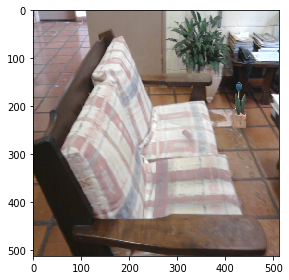

In [ ]:
imshow(X1_val[42])

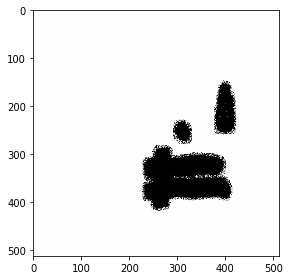

In [ ]:
#https://stackoverflow.com/questions/54664329/invalid-dimension-for-image-data-in-plt-imshow
imshow(np.squeeze(Y_val[42]))

In [ ]:
prediction = model.predict([X1_val,X2_val])

In [ ]:
prediction

array([[[[0.93884474],
         [0.9397197 ],
         [0.94038475],
         ...,
         [0.94106126],
         [0.9412428 ],
         [0.94174945]],

        [[0.9410025 ],
         [0.941141  ],
         [0.94447047],
         ...,
         [0.9453417 ],
         [0.9447415 ],
         [0.9423874 ]],

        [[0.94155   ],
         [0.9435812 ],
         [0.94567585],
         ...,
         [0.94662154],
         [0.9465567 ],
         [0.94273746]],

        ...,

        [[0.9424366 ],
         [0.94465923],
         [0.9466445 ],
         ...,
         [0.9466219 ],
         [0.9449229 ],
         [0.94109064]],

        [[0.9400537 ],
         [0.94254804],
         [0.9448846 ],
         ...,
         [0.9455616 ],
         [0.94376075],
         [0.93939954]],

        [[0.93728125],
         [0.9382368 ],
         [0.93975675],
         ...,
         [0.94053626],
         [0.93994945],
         [0.9386292 ]]],


       [[[0.94500595],
         [0.9464668 ],
         [0.94

In [ ]:
prediction.shape

(81, 512, 512, 1)

In [ ]:
def plot_predicted_images(index):
    """Plots the predicted masks of tampered images"""
    pred = np.squeeze(prediction[index])
    plt.imsave('pred_mask.png',pred)
    im_gray = cv2.imread('pred_mask.png', cv2.IMREAD_GRAYSCALE)
    (thresh, im_bw) = cv2.threshold(im_gray, 220, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    fig = plt.figure(figsize=(20,10))
    ax1 = fig.add_subplot(331)
    ax2 = fig.add_subplot(332)
    ax3 = fig.add_subplot(333)
    
    
    ax1.set_title("actual_image")
    ax2.set_title("actual_mask")
    ax3.set_title("predicted_mask")
    ax1.imshow(X1_val[index])
    ax2.imshow(np.squeeze(Y_val[index]))
    ax3.imshow(im_bw)   

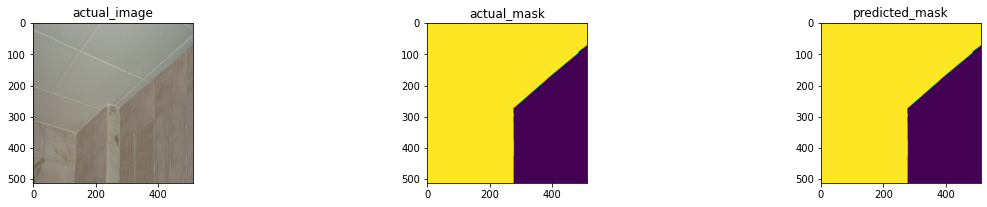

In [ ]:
plot_predicted_images(5)

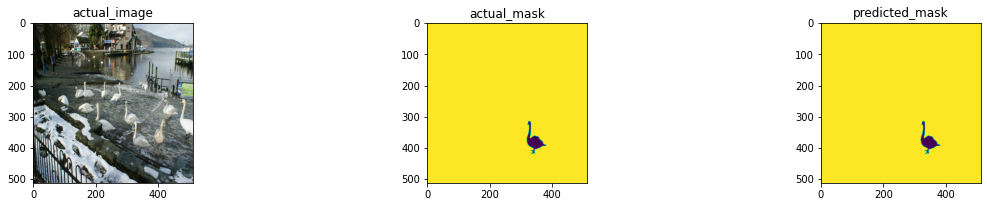

In [ ]:
 plot_predicted_images(7)

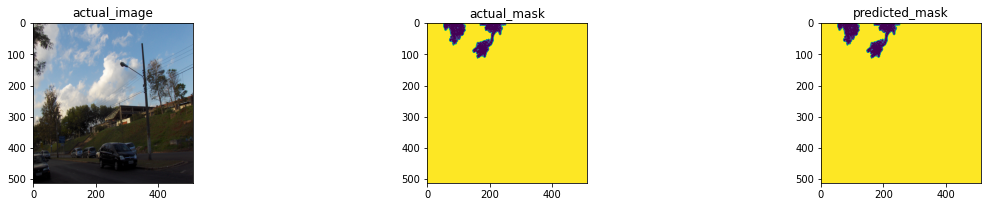

In [ ]:
 plot_predicted_images(29)

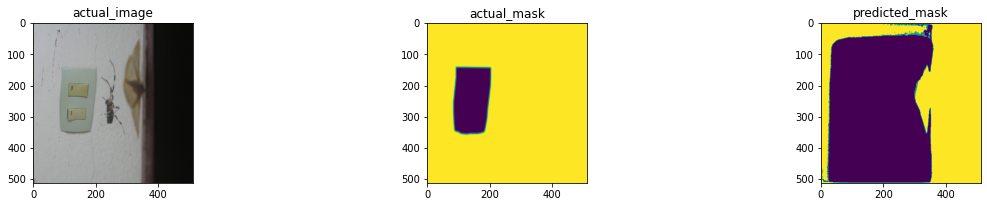

In [ ]:
 plot_predicted_images(77)

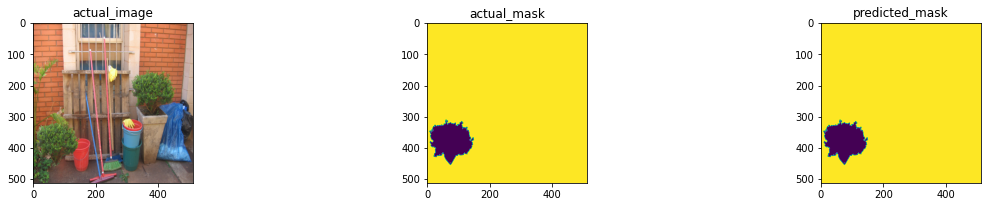

In [ ]:
 plot_predicted_images(51)

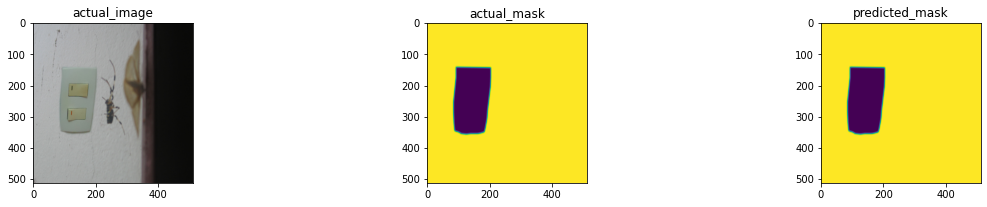

In [ ]:
 plot_predicted_images(77)

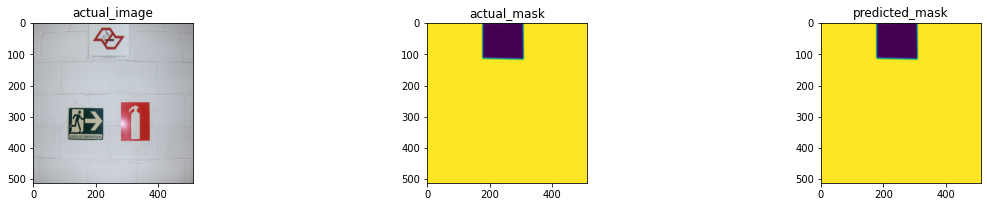

In [ ]:
 plot_predicted_images(80)